# Reading images files

In [45]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

In [47]:
TRAINING_CSV_PATH = "../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/*/*.csv"

IMAGE_WIDTH = 30
IMAGE_HEIGHT = IMAGE_WIDTH

In [38]:
os.path.dirname(TRAINING_CSV_PATH)

'../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/*'

In [64]:
def build_images_database(path):
    """ Build a pandas DataFrame with all images information.
    
    Parameters
    -----------
    path : path pattern to read csv files containing images information
    
    Returns
    ------
    A pandas DataFrame with one line per image
    
    """
    df_list = []
    for filename in glob.glob(path):
        df = pd.read_csv(filename, sep=";")
        df["path"] = os.path.dirname(filename) + '/' + df["Filename"]
        df_list.append(df)
        
    return pd.concat(df_list, ignore_index=True)


def build_images_list(filename_list, boxes_list=None):
    """ Build a list of images as Numpy array
    
    Parameters
    ----------
    filename_list : list of images filenames
    boxes_list : optional list of boxes for clipping within images. Boxes are 4 tuples (x1, y1, x2, y2)
    
    Returns
    --------
    A list of images as Numpy arrays
    
    """
    
    # If no boxes_list is given, generate a fake boxes list with None boxes
    # image.resize will take full size images if argument box==None
    if boxes_list is None:
        boxes_list = [None] * len(filename_list)
        
    assert len(filename_list) == len(boxes_list), "filename_list and boxes_list must have the same length"
    images_list = []
    for (filename, image_box) in zip(filename_list, boxes_list):
        image = Image.open(filename)
        image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT), box=image_box) #box argument clips image to (x1,y1,x2,y2)
        image = np.array(image)
        images_list.append(image)
        
    return images_list


In [40]:
images_df = build_images_database(TRAINING_CSV_PATH)
images_df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,path
0,00000_00000.ppm,29,30,5,6,24,25,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
1,00000_00001.ppm,30,30,5,5,25,25,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
2,00000_00002.ppm,30,30,5,5,25,25,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
3,00000_00003.ppm,31,31,5,5,26,26,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...
4,00000_00004.ppm,30,32,5,6,25,26,0,../data/raw/GTSRB_Final_Training_Images/GTSRB/...


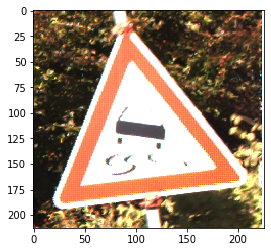

In [43]:
plt.imshow(Image.open(images_df.query("Width == 226")["path"].values[0]))

In [70]:
images_list = build_images_list(images_df.head(250)["path"].values, 
                                images_df.head(250).apply(lambda r: (r["Roi.X1"],r["Roi.Y1"],r["Roi.X2"],r["Roi.Y2"]),
                                                         axis=1).values)

In [78]:
#images_list[190]

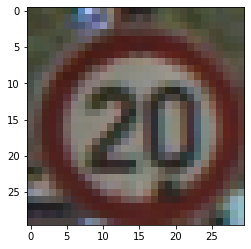

In [79]:
plt.imshow(images_list[190])

In [81]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [84]:
#{c-1: label for c, label in classes.items()}

In [ ]:
img=Image.open('../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00000/00000_00000.ppm')

In [9]:
img=Image.open('../data/raw/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00000/00005_00010.ppm')

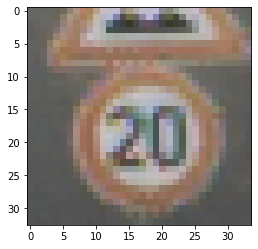

In [10]:
plt.imshow(img)